In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Mapping the data

In [3]:
# Field - Language

In [4]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [5]:
x = data_mapped.iloc[:,3:4] #this is the snippet which is changing the code
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### Clustering

In [6]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Clustering results

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [8]:
data_clusters = data_mapped.copy()
data_clusters['Clusters'] = identified_clusters
data_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


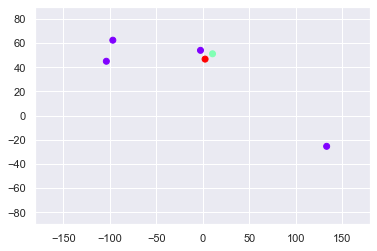

In [9]:
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c=data_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#cmap: for color, as the default color for matplotlib is not so pretty

In [10]:
### Clustering with language spoken

#### Let's do this continents

In [11]:
data1 = pd.read_csv("country w continents.csv")
data1

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [12]:
data1['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [13]:
data_mapped1 = data1.copy()
data_mapped1['continent'] = data_mapped1['continent'].map({'Asia':0,'North America':1, 'Africa':2, 'Europe':3, 
                                                           'Oceania':4, 'South America':5,'Antarctica':6, 
                                                           'Seven seas (open ocean)':7})
data_mapped1

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [14]:
x1 = data_mapped1.iloc[:,3:4]
x1

,continent
0,1
1,0
2,2
3,1
4,3
...,...
236,4
237,0
238,2
239,2


In [15]:
kmeans1 = KMeans(7)
kmeans1.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
identified_clusters1 = kmeans1.fit_predict(x1)
identified_clusters1

array([0, 4, 5, 0, 1, 1, 1, 4, 6, 4, 3, 2, 3, 2, 0, 3, 1, 4, 5, 1, 5, 5,
       4, 1, 4, 0, 0, 1, 0, 1, 0, 0, 6, 6, 0, 4, 4, 5, 5, 1, 6, 4, 5, 5,
       5, 5, 3, 6, 5, 5, 0, 0, 0, 0, 4, 4, 1, 1, 5, 0, 1, 0, 5, 6, 5, 5,
       1, 1, 5, 1, 3, 6, 1, 1, 3, 5, 1, 4, 1, 5, 5, 5, 5, 5, 1, 0, 0, 0,
       3, 6, 4, 2, 0, 1, 0, 1, 4, 1, 4, 4, 2, 1, 4, 4, 1, 4, 1, 0, 1, 4,
       4, 4, 4, 5, 4, 4, 3, 0, 4, 1, 4, 4, 4, 5, 5, 0, 1, 4, 5, 1, 1, 1,
       4, 0, 5, 1, 1, 5, 2, 0, 3, 1, 5, 1, 4, 1, 4, 3, 5, 5, 0, 2, 5, 4,
       5, 3, 5, 3, 5, 0, 3, 1, 1, 4, 3, 3, 4, 4, 0, 3, 6, 4, 3, 3, 1, 0,
       4, 1, 6, 4, 3, 4, 1, 1, 5, 5, 4, 5, 5, 5, 4, 2, 2, 3, 5, 0, 1, 5,
       5, 0, 1, 5, 6, 1, 1, 1, 5, 0, 2, 4, 0, 5, 5, 4, 4, 4, 4, 3, 0, 5,
       4, 4, 5, 5, 1, 6, 0, 4, 1, 0, 6, 0, 0, 4, 3, 3, 3, 4, 5, 5, 5])

In [17]:
data_clusters1 = data_mapped1.copy()
data_clusters1['Clusters'] = identified_clusters1
data_clusters1

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,1,0
1,Afghanistan,66.004734,33.835231,0,4
2,Angola,17.537368,-12.293361,2,5
3,Anguilla,-63.064989,18.223959,1,0
4,Albania,20.049834,41.142450,3,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4,3
237,Yemen,47.586762,15.909280,0,4
238,South Africa,25.083901,-29.000341,2,5
239,Zambia,27.774759,-13.458242,2,5


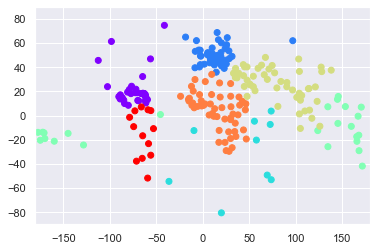

In [18]:
plt.scatter(data_clusters1['Longitude'], data_clusters1['Latitude'], c=data_clusters1['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#cmap: for color, as the default color for matplotlib is not so pretty